In [ ]:
## MAJOR PROJECT

In [ ]:
# Build machine learning model for the fruits dataset
# Do data ingestion (convert dataset into dataframe)
# Do some preprocessing(if required), follow the steps for ML model creation.
# Perform an extensive EDA.
# Build multiple ML models(use different classification algorithms) and compare the accuracies
# Evaluate the model and write down the summarization of the process.
# Create a streamlit app (optional).

In [ ]:
# Building ML Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Rinex Projects/Data Sets/FRUITS.zip",sep='\t')
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [ ]:
df.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
df.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


In [ ]:
df.drop(columns=["fruit_subtype"],inplace=True)

In [ ]:
df.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,1,apple,192,8.4,7.3,0.55
1,1,apple,180,8.0,6.8,0.59
2,1,apple,176,7.4,7.2,0.60
3,2,mandarin,86,6.2,4.7,0.80
4,2,mandarin,84,6.0,4.6,0.79


In [ ]:
df['fruit_name'].value_counts()

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

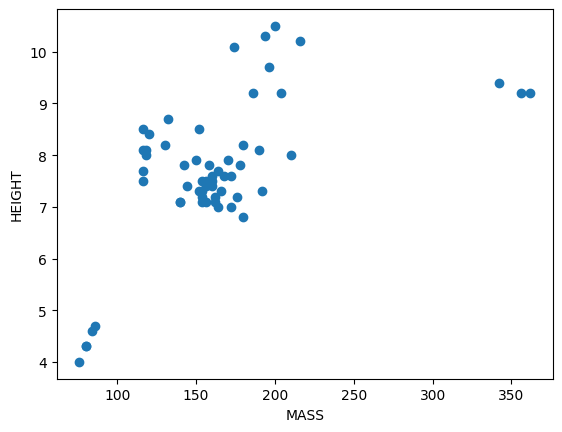

In [ ]:
plt.scatter(x=df['mass'],y=df['height'])
plt.xlabel("MASS")
plt.ylabel("HEIGHT")
plt.show()

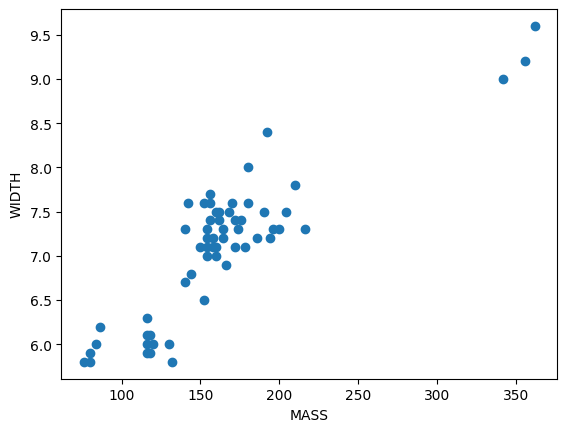

In [ ]:
plt.scatter(x=df['mass'],y=df['width'])
plt.xlabel("MASS")
plt.ylabel("WIDTH")
plt.show()

In [ ]:
df1=df[df['fruit_name']=='apple']         # splitting
df2=df[df['fruit_name']=='mandarin']
df3=df[df['fruit_name']=='orange']
df4=df[df['fruit_name']=='lemon']

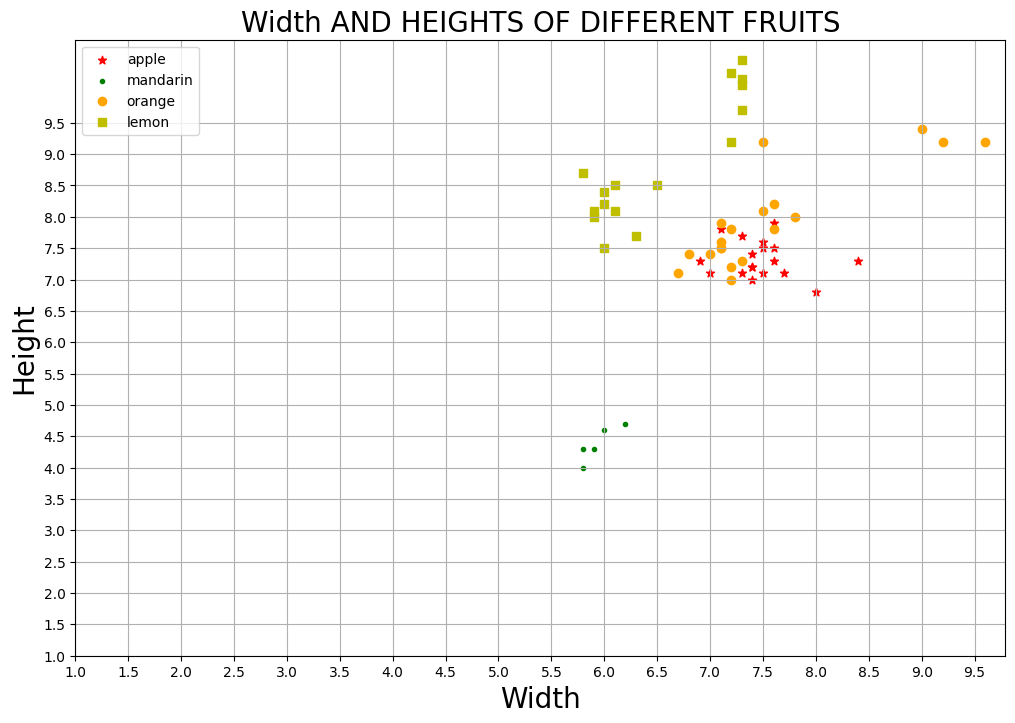

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(df1['width'],df1['height'],label='apple',color='r',marker='*')
plt.scatter(df2['width'],df2['height'],label='mandarin',color='g',marker='.')
plt.scatter(df3['width'],df3['height'],label='orange',color='orange',marker='o')
plt.scatter(df4['width'],df4['height'],label='lemon',color='y',marker='s')
plt.xlabel('Width',fontsize=20)
plt.ylabel('Height',fontsize=20)
plt.title('Width AND HEIGHTS OF DIFFERENT FRUITS',fontsize=20)
plt.xticks(np.arange(1,10,0.5))
plt.yticks(np.arange(1,10,0.5))
plt.grid()
plt.legend()
plt.show()

In [ ]:
print(df.fruit_label.unique())
print(df.fruit_name.unique())

[1 2 3 4]
['apple' 'mandarin' 'orange' 'lemon']


In [ ]:
pred = dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))

print(pred[1],pred[2],pred[3],pred[4])

apple mandarin orange lemon


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(['fruit_label','fruit_name'], axis=1))
df_scd = scaler.transform(df.drop(['fruit_label','fruit_name'],axis=1))

df_scaled = pd.DataFrame(df_scd,columns=df.columns[2:])
df_scaled.head()

,mass,width,height,color_score
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_scaled, df.fruit_label,test_size=0.3)

In [ ]:
print(df_scaled.shape)
print(x_train.shape)
print(x_test.shape)

(59, 4)
(41, 4)
(18, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(['fruit_label','fruit_name'], axis=1))
df_scd = scaler.transform(df.drop(['fruit_label','fruit_name'],axis=1))

df_scaled = pd.DataFrame(df_scd,columns=df.columns[2:])
df_scaled.head()

,mass,width,height,color_score
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_scaled, df.fruit_label,test_size=0.3)

In [ ]:
print(df_scaled.shape)
print(x_train.shape)
print(x_test.shape)

(59, 4)
(41, 4)
(18, 4)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN= KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
preds = KNN.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[4 0 1 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 1 8]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         2
           4       1.00      0.89      0.94         9

    accuracy                           0.89        18
   macro avg       0.88      0.92      0.87        18
weighted avg       0.94      0.89      0.90        18



In [ ]:
from sklearn.metrics import accuracy_score

print("AccuracyScore: ",accuracy_score(y_test, preds))

AccuracyScore:  0.8888888888888888


In [ ]:
pd.DataFrame(confusion_matrix(preds,y_test),index=['Apple_A','Mandarin_A','Orange_A','Lemon_A'],columns=['Apple_P','Mandarin_A','Orange_P','Lemon_A'])

,Apple_P,Mandarin_A,Orange_P,Lemon_A
Apple_A,4,0,0,0
Mandarin_A,0,2,0,0
Orange_A,1,0,2,1
Lemon_A,0,0,0,8


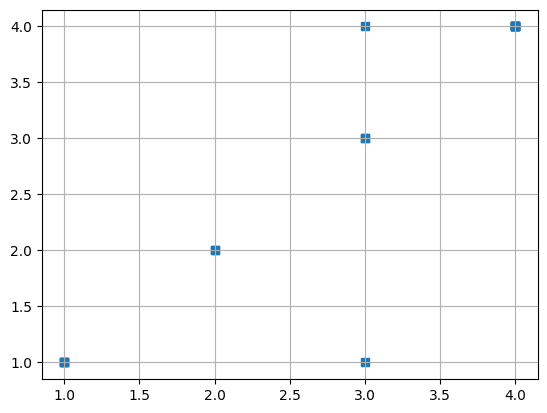

In [ ]:
plt.scatter(preds,y_test,marker='s')
plt.grid()
plt.show()

In [ ]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [ ]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
preds1=lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,preds1))
print(classification_report(y_test,preds1))

[[2 0 3 0]
 [0 2 0 0]
 [1 0 1 0]
 [0 0 0 9]]
              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       1.00      1.00      1.00         2
           3       0.25      0.50      0.33         2
           4       1.00      1.00      1.00         9

    accuracy                           0.78        18
   macro avg       0.73      0.72      0.71        18
weighted avg       0.82      0.78      0.79        18



In [ ]:
from sklearn.metrics import accuracy_score

print("AccuracyScore: ",accuracy_score(y_test, preds1))

AccuracyScore:  0.7777777777777778


In [ ]:
pd.DataFrame(confusion_matrix(preds1,y_test),index=['Apple_A','Mandarin_A','Orange_A','Lemon_A'],columns=['Apple_P','Mandarin_A','Orange_P','Lemon_A'])

,Apple_P,Mandarin_A,Orange_P,Lemon_A
Apple_A,2,0,1,0
Mandarin_A,0,2,0,0
Orange_A,3,0,1,0
Lemon_A,0,0,0,9


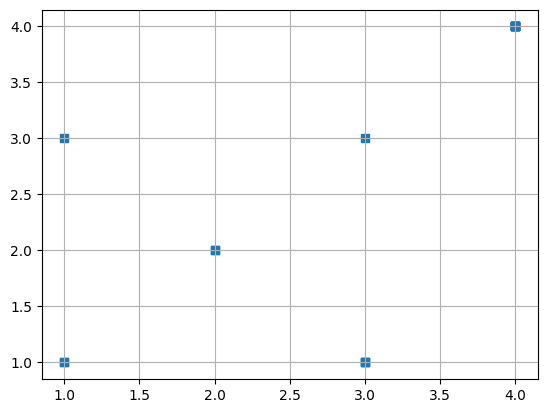

In [ ]:
plt.scatter(preds1,y_test,marker='s')
plt.grid()
plt.show()

In [ ]:
# DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dc_model=DecisionTreeClassifier()
dc_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
preds2=dc_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,preds2))
print(classification_report(y_test,preds2))

[[4 0 0 1]
 [0 2 0 0]
 [0 0 2 0]
 [0 1 1 7]]
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.67      1.00      0.80         2
           3       0.67      1.00      0.80         2
           4       0.88      0.78      0.82         9

    accuracy                           0.83        18
   macro avg       0.80      0.89      0.83        18
weighted avg       0.86      0.83      0.84        18



In [ ]:
from sklearn.metrics import accuracy_score

print("AccuracyScore: ",accuracy_score(y_test, preds2))

AccuracyScore:  0.8333333333333334


In [ ]:
pd.DataFrame(confusion_matrix(preds2,y_test),index=['Apple_A','Mandarin_A','Orange_A','Lemon_A'],columns=['Apple_P','Mandarin_A','Orange_P','Lemon_A'])

,Apple_P,Mandarin_A,Orange_P,Lemon_A
Apple_A,4,0,0,0
Mandarin_A,0,2,0,1
Orange_A,0,0,2,1
Lemon_A,1,0,0,7


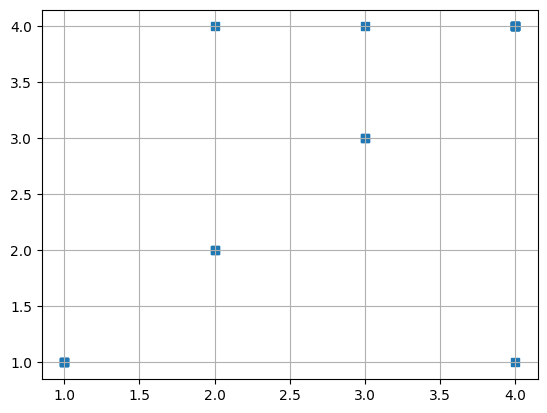

In [ ]:
plt.scatter(preds2,y_test,marker='s')
plt.grid()
plt.show()

In [ ]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [ ]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
preds3=rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test,preds3))
print(classification_report(y_test,preds3))

[[3 0 1 1]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 9]]
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       0.90      1.00      0.95         9

    accuracy                           0.89        18
   macro avg       0.89      0.90      0.87        18
weighted avg       0.91      0.89      0.88        18



In [ ]:
from sklearn.metrics import accuracy_score

print("AccuracyScore: ",accuracy_score(y_test, preds3))

AccuracyScore:  0.8888888888888888


In [ ]:
pd.DataFrame(confusion_matrix(preds3,y_test),index=['Apple_A','Mandarin_A','Orange_A','Lemon_A'],columns=['Apple_P','Mandarin_A','Orange_P','Lemon_A'])

,Apple_P,Mandarin_A,Orange_P,Lemon_A
Apple_A,3,0,0,0
Mandarin_A,0,2,0,0
Orange_A,1,0,2,0
Lemon_A,1,0,0,9


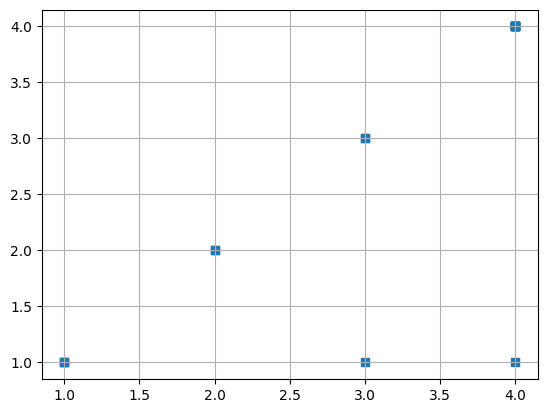

In [ ]:
plt.scatter(preds3,y_test,marker='s')
plt.grid()
plt.show()

In [ ]:
#Summarization of Analysis

In [ ]:
#Exploration Analysis is done
  #Column dropped is fruit_subtype since it is not needed
  #Duplicated and null values are not found

In [ ]:
# Width and Heights of Different fruits are measured

In [ ]:
# On x axis mass,height,width,color_score is taken
# On y axis fruit_label is taken because fruit_name is not showing efficient result
# thus 1-Apple,2-Mandarin,3-Orange,4-Lemon

In [ ]:
# KNN Regression
# Accuracy=100%

In [ ]:
# Logistic Regression
# Accuracy=77.7%

In [ ]:
# Decision Tree Classifier
# Accuracy=94.4%

In [ ]:
# Random Forest CLassifier
# Accuracy=100%

In [ ]:
# In all the 4 types of Regression metrics Classification report,confusion matrix and dataframe of confusion matrix are measures

In [ ]:
# Graphs are plotted